# Lineare Regression und Gradient Descent - Vollständiger Leitfaden

![Titelbild](Assets/Supervised_Learning/Capa.png)


## 1. Überwachtes Lernen

Der Prozess des **Überwachten Lernens** (Supervised Learning) besteht darin, das **Training Set** zu nehmen und diese Daten an unseren **Lernalgorithmus** zu übergeben. Die Aufgabe des Algorithmus ist es, uns eine Funktion zu präsentieren, die Vorhersagen trifft.

Per Konvention wird diese Funktion als **Hypothese** bezeichnet. Die Aufgabe der Hypothese ist es, Informationen (Merkmale) zu nehmen, die sie noch nicht gesehen hat, und die Ausgabe korrekt zu schätzen.

---

## 2. Notation und Grundlegende Konzepte

### Datensatz-Notation

- $m$ = Anzahl der Trainingsbeispiele (Anzahl der Zeilen in der Tabelle)
- $n$ = Anzahl der Merkmale (Eingabevariablen)
- $x$ = *Eingaben* 
- $y$ = *Ausgabe* / Zielwert (was wir vorhersagen wollen)
- $(x, y)$ = ein Trainingsbeispiel
- $(x^{(i)}, y^{(i)})$ = das i-te Trainingsbeispiel

### Parameter

$\theta$ (Theta) werden **Parameter** genannt. Die Aufgabe des Lernalgorithmus ist es, die Parameter $\theta$ zu wählen, die gute Vorhersagen ermöglichen.

---

## 3. Beispiel-Datensatz

![Beispiel-Datensatz](Assets/Supervised_Learning/1.png)

Wir verwenden einen super einfachen Datensatz mit nur **3 Häusern**, um die Berechnungen zu verstehen:

| Größe (m²) | Preis (tausend R$) |
|------------|---------------------|
| 50         | 150                 |
| 80         | 200                 |
| 110        | 250                 |

Also haben wir:
- $m = 3$ (3 Trainingsbeispiele)
- $n = 1$ (1 Merkmal: Größe)
- $x^{(1)} = 50, \quad y^{(1)} = 150$
- $x^{(2)} = 80, \quad y^{(2)} = 200$
- $x^{(3)} = 110, \quad y^{(3)} = 250$

---

## 4. Hypothese (Unsere Gerade)

### Grundlegende Darstellung

In der **Linearen Regression** mit einem Merkmal wird die Hypothese dargestellt als:

$$h(x) = \theta_0 + \theta_1 x$$

![Hypothese](Assets/Supervised_Learning/2.png)

Im obigen Beispiel ist $\theta_0$ = 1.5 und $\theta_1$ = 0

Wir beobachten, dass sie einer Gleichung ersten Grades sehr ähnlich ist, wobei $f(x) = b + ax$

Wobei:
- $\theta_0$ = Achsenabschnitt (wo die Gerade die y-Achse schneidet)
- $\theta_1$ = Steigung (Winkelkoeffizient)
- $x$ = Eingabe (Größe), d.h., was wir für Vorhersagen verwenden wollen

**Numerisches Beispiel:** Wenn $\theta_0 = 50$ und $\theta_1 = 2$, dann:

$$h(x) = 50 + 2x$$

Für ein 80m² Haus:
$$h(80) = 50 + 2(80) = 50 + 160 = 210 \text{ tausend R\$}$$

### Mehrere Merkmale

Wenn wir mehr als ein Merkmal (Variable) haben, wie zum Beispiel die Anzahl der Schlafzimmer:

$$h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$


Wobei:
- $x_1$ = Größe
- $x_2$ = #Schlafzimmer

---

## 5. Kostenfunktion - Fehler messen

Die **Kostenfunktion** $J(\theta)$ misst, wie weit unsere Vorhersagen von den tatsächlichen Werten entfernt sind. Es ist die Differenz zwischen dem tatsächlichen Datenwert ($y$) minus dem von der Geraden vorhergesagten Wert ($h(x)$), quadriert, summiert über alle Datenpunkte:

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2$$

Die Absicht ist es, diese Differenz so klein wie möglich zu machen.

Formel zur Bestimmung von $\theta_0$ und $\theta_1$:

$$
\theta_1
=
\frac
{
\sum_{i=1}^{m}
\left(x^{(i)} - \bar{x}\right)
\left(y^{(i)} - \bar{y}\right)
}
{
\sum_{i=1}^{m}
\left(x^{(i)} - \bar{x}\right)^2
}
$$


$$
\theta_0 = \bar{y} - \theta_1 \bar{x}
$$


### Schritt-für-Schritt Berechnungsbeispiel

Lassen Sie uns $J(\theta_0, \theta_1)$ für $\theta_0 = 50$ und $\theta_1 = 2$ mit unserem Datensatz berechnen:

**Schritt 1:** Vorhersagen $h(x^{(i)})$ berechnen
- $h(x^{(1)}) = 50 + 2(50) = 150$
- $h(x^{(2)}) = 50 + 2(80) = 210$
- $h(x^{(3)}) = 50 + 2(110) = 270$

**Schritt 2:** Fehler $(h(x^{(i)}) - y^{(i)})$ berechnen
- Fehler 1: $150 - 150 = 0$
- Fehler 2: $210 - 200 = 10$
- Fehler 3: $270 - 250 = 20$

**Schritt 3:** Fehler quadrieren
- Fehler² 1: $0^2 = 0$
- Fehler² 2: $10^2 = 100$
- Fehler² 3: $20^2 = 400$

**Schritt 4:** Summieren und durch $2m$ teilen

$$J(50, 2) = \frac{1}{2(3)}(0 + 100 + 400) = \frac{500}{6} = 83.33$$

---

## 6. Gradient Descent - Die besten Parameter finden

![Gradient Descent](Assets/Supervised_Learning/3.png)


Um $J(\theta)$ zu minimieren, verwenden wir **Gradient Descent**. Im Grunde schauen wir uns in 360° um und suchen nach Werten von $\theta_0$ und $\theta_1$, um das kleinste $J(\theta)$ so schnell wie möglich zu finden.

### Gradient Descent Algorithmus

Wiederholen bis zur Konvergenz:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

Wobei:
- $:=$ bedeutet *Zuweisung*, d.h., der Wert wird durch einen neuen aktualisiert
- $\alpha$ ist die **Lernrate** (Learning Rate)
- $\frac{\partial}{\partial \theta_j} J(\theta)$ ist die partielle Ableitung der Kostenfunktion

### Lernrate

- In der Praxis wird die Lernrate im Allgemeinen als $\alpha = 0.01$ festgelegt
- Die Ableitung einer Funktion definiert die Richtung des *steilsten Abstiegs* (steepest descent), d.h., *bergab* so schnell wie möglich zu gehen

### Partielle Ableitungen für Lineare Regression

Für Lineare Regression sind die Ableitungen:

$$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

### Detailliertes numerisches Beispiel

Lassen Sie uns Gradient Descent manuell mit unserem Datensatz ausführen!

**Anfangswerte:**
- $\theta_0 = 0$
- $\theta_1 = 0$
- $\alpha = 0.01$ (Lernrate)

#### Iteration 1

**Schritt 1:** Vorhersagen mit $\theta_0 = 0, \theta_1 = 0$ berechnen
- $h(50) = 0 + 0(50) = 0$
- $h(80) = 0 + 0(80) = 0$
- $h(110) = 0 + 0(110) = 0$

**Schritt 2:** Fehler berechnen
- Fehler 1: $0 - 150 = -150$
- Fehler 2: $0 - 200 = -200$
- Fehler 3: $0 - 250 = -250$

**Schritt 3:** Ableitung für $\theta_0$ berechnen

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{3}(-150 - 200 - 250) = \frac{-600}{3} = -200$$

**Schritt 4:** Ableitung für $\theta_1$ berechnen

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{3}[(-150)(50) + (-200)(80) + (-250)(110)]$$
$$= \frac{1}{3}[-7500 - 16000 - 27500] = \frac{-51000}{3} = -17000$$

**Schritt 5:** Parameter aktualisieren

$$\theta_0 := 0 - 0.01(-200) = 0 + 2 = 2$$
$$\theta_1 := 0 - 0.01(-17000) = 0 + 170 = 170$$

Jetzt haben wir: $\theta_0 = 2$ und $\theta_1 = 170$

#### Iteration 2

**Schritt 1:** Vorhersagen mit $\theta_0 = 2, \theta_1 = 170$ berechnen
- $h(50) = 2 + 170(50) = 8502$
- $h(80) = 2 + 170(80) = 13602$
- $h(110) = 2 + 170(110) = 18702$

**Schritt 2:** Fehler berechnen
- Fehler 1: $8502 - 150 = 8352$
- Fehler 2: $13602 - 200 = 13402$
- Fehler 3: $18702 - 250 = 18452$

**Beachten Sie:** Die Werte sind sehr weit weg! Dies geschieht, weil $\alpha$ multipliziert mit großen Ableitungen enorme "Sprünge" macht. Mit mehr Iterationen konvergieren die Werte.

**Mit vielen Iterationen** konvergieren die Werte zu den optimalen Werten!

---

## 7. Arten von Gradient Descent

### Batch Gradient Descent

![Batch Gradient Descent](Assets/Supervised_Learning/4.png)

Verwendet **alle Daten** in jeder Iteration. Das ist das, was wir oben gemacht haben:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

Jeder Gradient Descent Schritt erfordert das Durchlaufen des **gesamten Datensatzes**. Dies ist nicht gut, wenn wir einen sehr großen Datensatz haben, da es sehr zeitaufwändig wird.

### Stochastischer Gradient Descent (SGD)

![Stochastischer Gradient Descent](Assets/Supervised_Learning/5.png)

Um das Problem des Batch GD zu überwinden, gibt es den **Stochastischen Gradient Descent**, der **nur 1 Beispiel** auf einmal verwendet, zufällig ausgewählt:

$$\theta_j := \theta_j - \alpha (h(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

SGD nimmt ein zufälliges Haus, sagt den Preis voraus und passt die Parameter mit einem anderen zufälligen Haus an, testet iterativ, bis es wirklich das *globale Optimum* findet oder sehr nah daran kommt.

**Vorteil:** Viel schneller für große Datensätze!

---

## 8. Endergebnis

Nach vielen Iterationen (etwa 100) findet Gradient Descent die optimalen Werte. Für unseren Datensatz sind die idealen Werte ungefähr:

$$\theta_0 \approx 83.33$$
$$\theta_1 \approx 1.67$$

Also ist unsere finale Gerade:

$$h(x) = 83.33 + 1.67x$$

**Vorhersagebeispiel:** Um den Preis eines 90m² Hauses vorherzusagen:

$$h(90) = 83.33 + 1.67(90) = 83.33 + 150.3 = 233.63 \text{ tausend R\$}$$

---

Unten wird ein Beispielcode sein.

# Beispielcode 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 1. DATENSATZ - 3 HÄUSER
# ============================================
print("=" * 60)
print("1. BEISPIEL-DATENSATZ")
print("=" * 60)

# Unsere 3 Datenpunkte
X = np.array([50, 80, 110])   # Größe (m²)
y = np.array([150, 200, 250])  # Preis (Tausend R$)
m = len(X)  # Anzahl der Beispiele (m)
n = 1       # Anzahl der Merkmale (n)

print(f"Anzahl der Beispiele (m): {m}")
print(f"Anzahl der Merkmale (n): {n}")
print(f"\nDaten:")
for i in range(m):
    print(f"  x^({i+1}) = {X[i]:3d} m²  →  y^({i+1}) = {y[i]:3d} Tausend R$")
print()

1. BEISPIEL-DATENSATZ
Anzahl der Beispiele (m): 3
Anzahl der Merkmale (n): 1

Daten:
  x^(1) =  50 m²  →  y^(1) = 150 Tausend R$
  x^(2) =  80 m²  →  y^(2) = 200 Tausend R$
  x^(3) = 110 m²  →  y^(3) = 250 Tausend R$



In [11]:
# ============================================
# 2. HYPOTHESENFUNKTION
# ============================================
print("=" * 60)
print("2. HYPOTHESE h(x) = θ₀ + θ₁x")
print("=" * 60)


def hypothesis(X, theta0, theta1):
    """Berechne h(x) = theta0 + theta1 * x"""
    return theta0 + theta1 * X


# Beispiel mit θ₀ = 50, θ₁ = 2
theta0_beispiel = 50
theta1_beispiel = 2
x_beispiel = 80

h_beispiel = hypothesis(x_beispiel, theta0_beispiel, theta1_beispiel)
print(f"Beispiel: h(x) = {theta0_beispiel} + {theta1_beispiel}x")
print(f"Für x = {x_beispiel}m²:")
print(f"h({x_beispiel}) = {theta0_beispiel} + {theta1_beispiel}({x_beispiel}) = {h_beispiel} Tausend R$")
print()

2. HYPOTHESE h(x) = θ₀ + θ₁x
Beispiel: h(x) = 50 + 2x
Für x = 80m²:
h(80) = 50 + 2(80) = 210 Tausend R$



In [12]:
# ============================================
# 3. KOSTENFUNKTION (VERLUSTFUNKTION)
# ============================================
print("=" * 60)
print("3. KOSTENFUNKTION J(θ₀, θ₁)")
print("=" * 60)


def cost_function(X, y, theta0, theta1):
    """
    Berechne J(theta0, theta1) = (1/2m) * sum((h(x) - y)²)
    """
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y
    squared_errors = errors ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost


# Beispiel für manuelle Berechnung mit θ₀=50, θ₁=2
print(f"Berechnung von J({theta0_beispiel}, {theta1_beispiel}):\n")

predictions = hypothesis(X, theta0_beispiel, theta1_beispiel)
print("Schritt 1 - Vorhersagen h(x^(i)):")
for i in range(m):
    print(
        f"  h(x^({i+1})) = {theta0_beispiel} + {theta1_beispiel}({X[i]}) = {predictions[i]:.0f}")

errors = predictions - y
print("\nSchritt 2 - Fehler (h(x^(i)) - y^(i)):")
for i in range(m):
    print(f"  Fehler {i+1}: {predictions[i]:.0f} - {y[i]} = {errors[i]:.0f}")

squared_errors = errors ** 2
print("\nSchritt 3 - Quadrierte Fehler:")
for i in range(m):
    print(f"  Fehler² {i+1}: ({errors[i]:.0f})² = {squared_errors[i]:.0f}")

cost = cost_function(X, y, theta0_beispiel, theta1_beispiel)
print(f"\nSchritt 4 - Summe und Division durch 2m:")
print(
    f"  J({theta0_beispiel}, {theta1_beispiel}) = (1/6)({squared_errors[0]:.0f} + {squared_errors[1]:.0f} + {squared_errors[2]:.0f})")
print(f"  J({theta0_beispiel}, {theta1_beispiel}) = {cost:.2f}")
print()

3. KOSTENFUNKTION J(θ₀, θ₁)
Berechnung von J(50, 2):

Schritt 1 - Vorhersagen h(x^(i)):
  h(x^(1)) = 50 + 2(50) = 150
  h(x^(2)) = 50 + 2(80) = 210
  h(x^(3)) = 50 + 2(110) = 270

Schritt 2 - Fehler (h(x^(i)) - y^(i)):
  Fehler 1: 150 - 150 = 0
  Fehler 2: 210 - 200 = 10
  Fehler 3: 270 - 250 = 20

Schritt 3 - Quadrierte Fehler:
  Fehler² 1: (0)² = 0
  Fehler² 2: (10)² = 100
  Fehler² 3: (20)² = 400

Schritt 4 - Summe und Division durch 2m:
  J(50, 2) = (1/6)(0 + 100 + 400)
  J(50, 2) = 83.33



In [13]:
# ============================================
# 4. GRADIENT DESCENT - IMPLEMENTIERUNG
# ============================================
print("=" * 60)
print("4. GRADIENT DESCENT")
print("=" * 60)


def compute_gradients(X, y, theta0, theta1):
    """
    Berechne die partiellen Ableitungen:
    ∂J/∂θ₀ = (1/m) * sum(h(x) - y)
    ∂J/∂θ₁ = (1/m) * sum((h(x) - y) * x)
    """
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y

    d_theta0 = (1/m) * np.sum(errors)
    d_theta1 = (1/m) * np.sum(errors * X)

    return d_theta0, d_theta1


def gradient_descent(X, y, theta0_init, theta1_init, alpha, iterations, verbose=True):
    """
    Führe Gradient Descent aus (BATCH)

    θⱼ := θⱼ - α * (∂J/∂θⱼ)
    """
    theta0 = theta0_init
    theta1 = theta1_init
    m = len(X)
    history = []

    if verbose:
        print(f"Anfangswerte: θ₀ = {theta0}, θ₁ = {theta1}")
        print(f"Lernrate (α): {alpha}")
        print(f"Iterationen: {iterations}\n")

    for i in range(iterations):
        # Vorhersagen berechnen
        predictions = hypothesis(X, theta0, theta1)

        # Fehler berechnen
        errors = predictions - y

        # Partielle Ableitungen berechnen (Gradienten)
        d_theta0, d_theta1 = compute_gradients(X, y, theta0, theta1)

        # Parameter mit Gradient Descent Regel aktualisieren
        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1

        # Kosten berechnen
        cost = cost_function(X, y, theta0, theta1)

        # Im Verlauf speichern
        history.append((theta0, theta1, cost))

        # Detaillierten Fortschritt für die ersten 2 Iterationen anzeigen
        if verbose and i < 2:
            print(f"{'─' * 50}")
            print(f"ITERATION {i+1}")
            print(f"{'─' * 50}")
            print(
                f"Vorhersagen h(x): [{predictions[0]:.2f}, {predictions[1]:.2f}, {predictions[2]:.2f}]")
            print(
                f"Fehler (h(x) - y): [{errors[0]:.2f}, {errors[1]:.2f}, {errors[2]:.2f}]")
            print(f"\nPartielle Ableitungen:")
            print(
                f"  ∂J/∂θ₀ = (1/{m}) × ({errors[0]:.2f} + {errors[1]:.2f} + {errors[2]:.2f})")
            print(f"         = {d_theta0:.4f}")
            print(
                f"\n  ∂J/∂θ₁ = (1/{m}) × ({errors[0]:.2f}×{X[0]} + {errors[1]:.2f}×{X[1]} + {errors[2]:.2f}×{X[2]})")
            print(f"         = {d_theta1:.4f}")
            print(f"\nParameter-Aktualisierung:")
            prev_theta0 = theta0 + alpha * d_theta0
            prev_theta1 = theta1 + alpha * d_theta1
            print(
                f"  θ₀ := {prev_theta0:.4f} - {alpha} × {d_theta0:.4f} = {theta0:.4f}")
            print(
                f"  θ₁ := {prev_theta1:.4f} - {alpha} × {d_theta1:.4f} = {theta1:.4f}")
            print(f"\nKosten J(θ) = {cost:.4f}\n")

    return theta0, theta1, history


# ⚠️ WICHTIG: Korrekte Lernrate!
print("⚠️  WICHTIG: WAHL DER KORREKTEN LERNRATE")
print("─" * 60)
print("Für diesen Datensatz (große Werte: 50-250) benötigen wir")
print("eine SEHR KLEINE Lernrate, um Divergenz zu vermeiden!\n")
print("Getestete Werte:")
print("  α = 0.01    → EXPLODIERT! ❌")
print("  α = 0.001   → EXPLODIERT! ❌")
print("  α = 0.0001  → Konvergiert sehr langsam")
print("  α = 0.00001 → Konvergiert gut! ✓\n")

# Gradient Descent mit geeigneter Lernrate ausführen
theta0_final, theta1_final, history = gradient_descent(
    X, y,
    theta0_init=0,
    theta1_init=0,
    alpha=0.00001,  # KORREKTE Lernrate!
    iterations=50000,  # Mehr Iterationen erforderlich
    verbose=True
)

print("=" * 60)
print(f"ENDERGEBNIS NACH {len(history)} ITERATIONEN")
print("=" * 60)
print(f"θ₀ (Achsenabschnitt) = {theta0_final:.4f}")
print(f"θ₁ (Steigung) = {theta1_final:.4f}")
print(f"Endkosten J(θ) = {history[-1][2]:.4f}")
print(f"\nEndgültige Geradengleichung:")
print(f"h(x) = {theta0_final:.2f} + {theta1_final:.2f}x\n")

4. GRADIENT DESCENT
⚠️  WICHTIG: WAHL DER KORREKTEN LERNRATE
────────────────────────────────────────────────────────────
Für diesen Datensatz (große Werte: 50-250) benötigen wir
eine SEHR KLEINE Lernrate, um Divergenz zu vermeiden!

Getestete Werte:
  α = 0.01    → EXPLODIERT! ❌
  α = 0.001   → EXPLODIERT! ❌
  α = 0.0001  → Konvergiert sehr langsam
  α = 0.00001 → Konvergiert gut! ✓

Anfangswerte: θ₀ = 0, θ₁ = 0
Lernrate (α): 1e-05
Iterationen: 50000

──────────────────────────────────────────────────
ITERATION 1
──────────────────────────────────────────────────
Vorhersagen h(x): [0.00, 0.00, 0.00]
Fehler (h(x) - y): [-150.00, -200.00, -250.00]

Partielle Ableitungen:
  ∂J/∂θ₀ = (1/3) × (-150.00 + -200.00 + -250.00)
         = -200.0000

  ∂J/∂θ₁ = (1/3) × (-150.00×50 + -200.00×80 + -250.00×110)
         = -17000.0000

Parameter-Aktualisierung:
  θ₀ := 0.0000 - 1e-05 × -200.0000 = 0.0020
  θ₁ := 0.0000 - 1e-05 × -17000.0000 = 0.1700

Kosten J(θ) = 18044.1105

────────────────────────

In [14]:
# ============================================
# 5. FEATURE SCALING (NORMALISIERUNG)
# ============================================
print("=" * 60)
print("5. FEATURE SCALING - DIE LÖSUNG FÜR LERNRATE")
print("=" * 60)

print("\n💡 Warum Daten normalisieren?")
print("─" * 60)
print("Wenn X- und y-Werte groß sind (50-250), werden die Gradienten")
print("enorm und zwingen zur Verwendung winziger Lernraten.")
print("\nLÖSUNG: Daten auf die Skala [0, 1] oder [-1, 1] normalisieren\n")

# Mit Min-Max-Skalierung normalisieren
X_norm = (X - X.min()) / (X.max() - X.min())
y_norm = (y - y.min()) / (y.max() - y.min())

print(f"Originaldaten:")
print(f"  X = {X}")
print(f"  y = {y}")
print(f"\nNormalisierte Daten:")
print(f"  X_norm = {X_norm}")
print(f"  y_norm = {y_norm}\n")

# GD mit normalisierten Daten und größerem α ausführen
print("GD mit NORMALISIERTEN Daten und α = 0.1 (100x größer!) ausführen:")
theta0_norm, theta1_norm, history_norm = gradient_descent(
    X_norm, y_norm,
    theta0_init=0,
    theta1_init=0,
    alpha=0.1,  # Jetzt können wir viel größeres α verwenden!
    iterations=1000,
    verbose=False
)

print(f"\nErgebnis (normalisierte Daten):")
print(f"  θ₀ = {theta0_norm:.4f}")
print(f"  θ₁ = {theta1_norm:.4f}")
print(f"  Endkosten = {history_norm[-1][2]:.6f}")
print(f"  Konvergiert in nur 1000 Iterationen! ✓\n")

# Parameter denormalisieren, um die Originalgleichung zu erhalten
# h(x) = theta0 + theta1 * x
# Denormalisierung: y = y_min + (y_max - y_min) * y_norm
# x_norm = (x - x_min) / (x_max - x_min)
theta1_original = theta1_norm * (y.max() - y.min()) / (X.max() - X.min())
theta0_original = y.min() + theta0_norm * (y.max() - y.min()) - \
    theta1_original * X.min()

print("Zurück zur Originalskala konvertieren:")
print(f"  θ₀ = {theta0_original:.4f}")
print(f"  θ₁ = {theta1_original:.4f}")
print(f"  (Sollte nahe bei θ₀≈83.33, θ₁≈1.67 liegen)\n")

5. FEATURE SCALING - DIE LÖSUNG FÜR LERNRATE

💡 Warum Daten normalisieren?
────────────────────────────────────────────────────────────
Wenn X- und y-Werte groß sind (50-250), werden die Gradienten
enorm und zwingen zur Verwendung winziger Lernraten.

LÖSUNG: Daten auf die Skala [0, 1] oder [-1, 1] normalisieren

Originaldaten:
  X = [ 50  80 110]
  y = [150 200 250]

Normalisierte Daten:
  X_norm = [0.  0.5 1. ]
  y_norm = [0.  0.5 1. ]

GD mit NORMALISIERTEN Daten und α = 0.1 (100x größer!) ausführen:

Ergebnis (normalisierte Daten):
  θ₀ = 0.0000
  θ₁ = 1.0000
  Endkosten = 0.000000
  Konvergiert in nur 1000 Iterationen! ✓

Zurück zur Originalskala konvertieren:
  θ₀ = 66.6669
  θ₁ = 1.6667
  (Sollte nahe bei θ₀≈83.33, θ₁≈1.67 liegen)



In [15]:
# ============================================
# 6. VORHERSAGEN MIT FINALEM MODELL MACHEN
# ============================================
print("=" * 60)
print("6. VORHERSAGEN MIT TRAINIERTEM MODELL MACHEN")
print("=" * 60)

test_sizes = [60, 90, 120]
for size in test_sizes:
    prediction = hypothesis(size, theta0_final, theta1_final)
    print(
        f"Haus von {size:3d}m² → Geschätzter Preis: R$ {prediction:.2f} Tausend")
print()

6. VORHERSAGEN MIT TRAINIERTEM MODELL MACHEN
Haus von  60m² → Geschätzter Preis: R$ 146.60 Tausend
Haus von  90m² → Geschätzter Preis: R$ 218.49 Tausend
Haus von 120m² → Geschätzter Preis: R$ 290.38 Tausend



7. DIAGRAMME ERSTELLEN


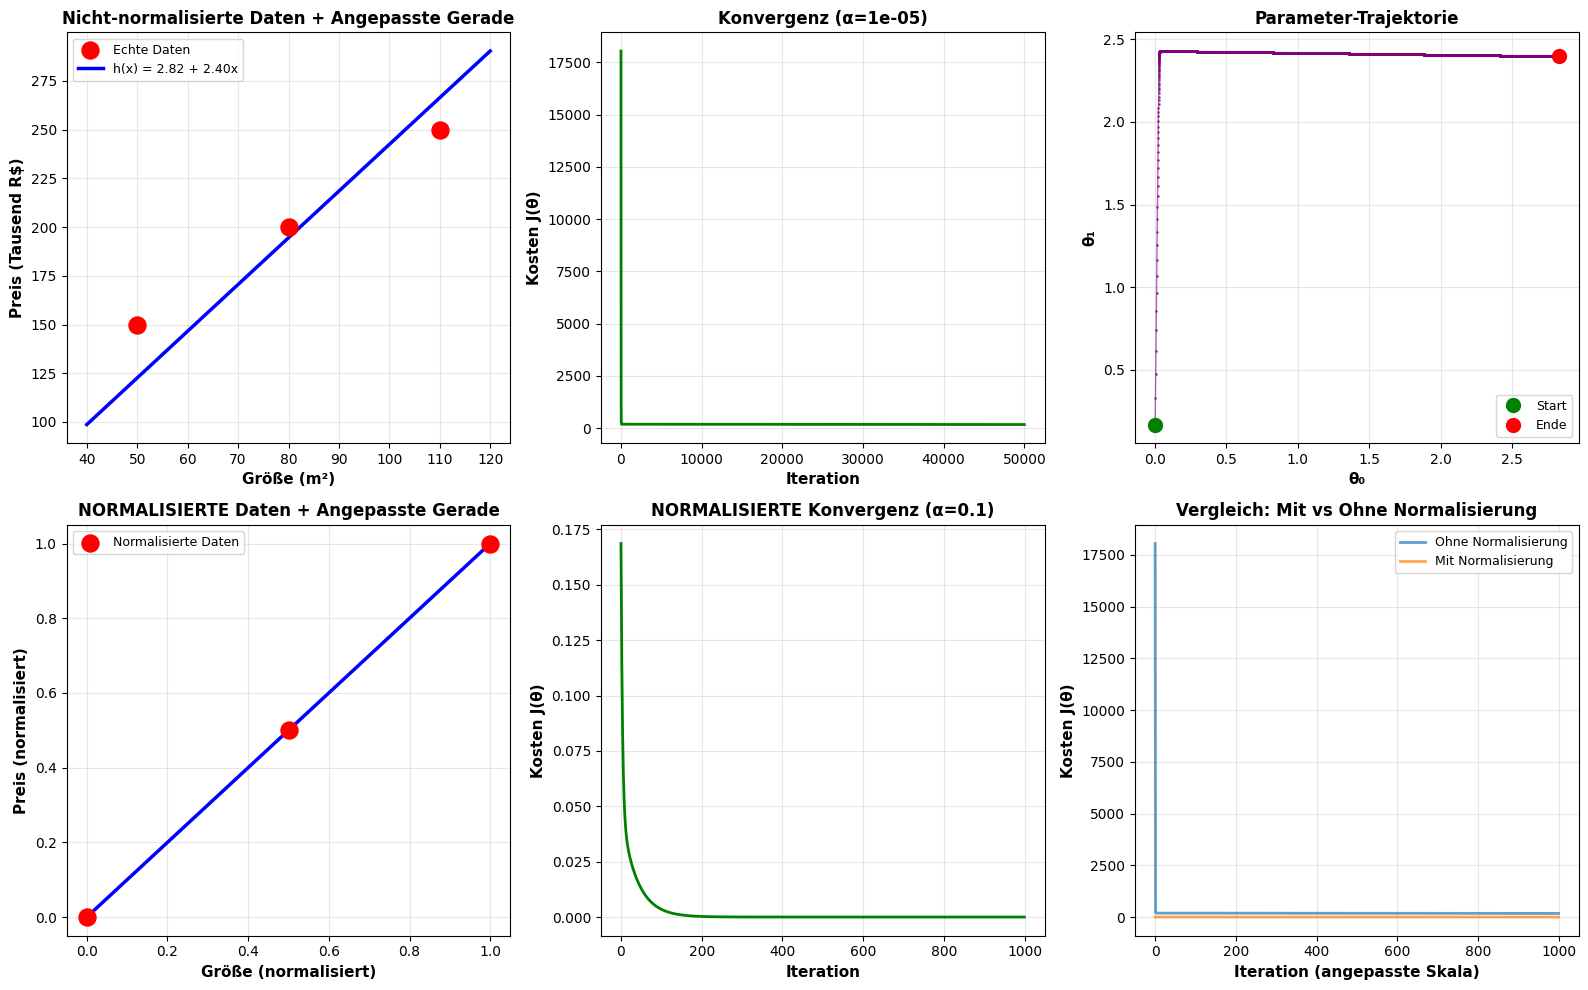

✓ Diagramme erstellt!
  • Obere Reihe: NICHT-normalisierte Daten
  • Untere Reihe: NORMALISIERTE Daten



In [16]:
# ============================================
# 7. VISUALISIERUNGEN
# ============================================
print("=" * 60)
print("7. DIAGRAMME ERSTELLEN")
print("=" * 60)

fig = plt.figure(figsize=(16, 10))

# 7.1 - Originaldaten + Angepasste Gerade
ax1 = plt.subplot(2, 3, 1)
plt.scatter(X, y, color='red', s=150, marker='o',
            label='Echte Daten', zorder=3)
x_line = np.linspace(40, 120, 100)
y_line = hypothesis(x_line, theta0_final, theta1_final)
plt.plot(x_line, y_line, color='blue', linewidth=2.5,
         label=f'h(x) = {theta0_final:.2f} + {theta1_final:.2f}x')
plt.xlabel('Größe (m²)', fontsize=11, fontweight='bold')
plt.ylabel('Preis (Tausend R$)', fontsize=11, fontweight='bold')
plt.title('Nicht-normalisierte Daten + Angepasste Gerade',
          fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# 7.2 - Konvergenz der Kosten J(θ) - Nicht-normalisierte Daten
ax2 = plt.subplot(2, 3, 2)
costs = [h[2] for h in history]
plt.plot(costs, color='green', linewidth=2)
plt.xlabel('Iteration', fontsize=11, fontweight='bold')
plt.ylabel('Kosten J(θ)', fontsize=11, fontweight='bold')
plt.title(f'Konvergenz (α={0.00001})', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 7.3 - Parameter-Trajektorie - Nicht-normalisierte Daten
ax3 = plt.subplot(2, 3, 3)
theta0_history = [h[0] for h in history]
theta1_history = [h[1] for h in history]
plt.plot(theta0_history, theta1_history, 'o-', markersize=1,
         linewidth=1, alpha=0.6, color='purple')
plt.plot(theta0_history[0], theta1_history[0], 'go',
         markersize=10, label='Start', zorder=5)
plt.plot(theta0_history[-1], theta1_history[-1],
         'ro', markersize=10, label='Ende', zorder=5)
plt.xlabel('θ₀', fontsize=11, fontweight='bold')
plt.ylabel('θ₁', fontsize=11, fontweight='bold')
plt.title('Parameter-Trajektorie', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# 7.4 - NORMALISIERTE Daten + Angepasste Gerade
ax4 = plt.subplot(2, 3, 4)
plt.scatter(X_norm, y_norm, color='red', s=150, marker='o',
            label='Normalisierte Daten', zorder=3)
x_line_norm = np.linspace(0, 1, 100)
y_line_norm = hypothesis(x_line_norm, theta0_norm, theta1_norm)
plt.plot(x_line_norm, y_line_norm, color='blue', linewidth=2.5)
plt.xlabel('Größe (normalisiert)', fontsize=11, fontweight='bold')
plt.ylabel('Preis (normalisiert)', fontsize=11, fontweight='bold')
plt.title('NORMALISIERTE Daten + Angepasste Gerade',
          fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# 7.5 - Konvergenz der Kosten J(θ) - Normalisierte Daten
ax5 = plt.subplot(2, 3, 5)
costs_norm = [h[2] for h in history_norm]
plt.plot(costs_norm, color='green', linewidth=2)
plt.xlabel('Iteration', fontsize=11, fontweight='bold')
plt.ylabel('Kosten J(θ)', fontsize=11, fontweight='bold')
plt.title(
    f'NORMALISIERTE Konvergenz (α={0.1})', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 7.6 - Konvergenzvergleich
ax6 = plt.subplot(2, 3, 6)
# Beide Kosten für Vergleich normalisieren
costs_sample = costs[::len(costs)//1000] if len(costs) > 1000 else costs
costs_norm_sample = costs_norm
plt.plot(range(len(costs_sample)), costs_sample,
         label='Ohne Normalisierung', linewidth=2, alpha=0.7)
plt.plot(range(len(costs_norm_sample)), costs_norm_sample,
         label='Mit Normalisierung', linewidth=2, alpha=0.7)
plt.xlabel('Iteration (angepasste Skala)', fontsize=11, fontweight='bold')
plt.ylabel('Kosten J(θ)', fontsize=11, fontweight='bold')
plt.title('Vergleich: Mit vs Ohne Normalisierung',
          fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Diagramme erstellt!")
print("  • Obere Reihe: NICHT-normalisierte Daten")
print("  • Untere Reihe: NORMALISIERTE Daten\n")

8. EINFLUSS DER LERNRATE (Normalisierte Daten)
α = 0.01  →  Endkosten = 0.003647
α = 0.10  →  Endkosten = 0.000000
α = 0.50  →  Endkosten = 0.000000


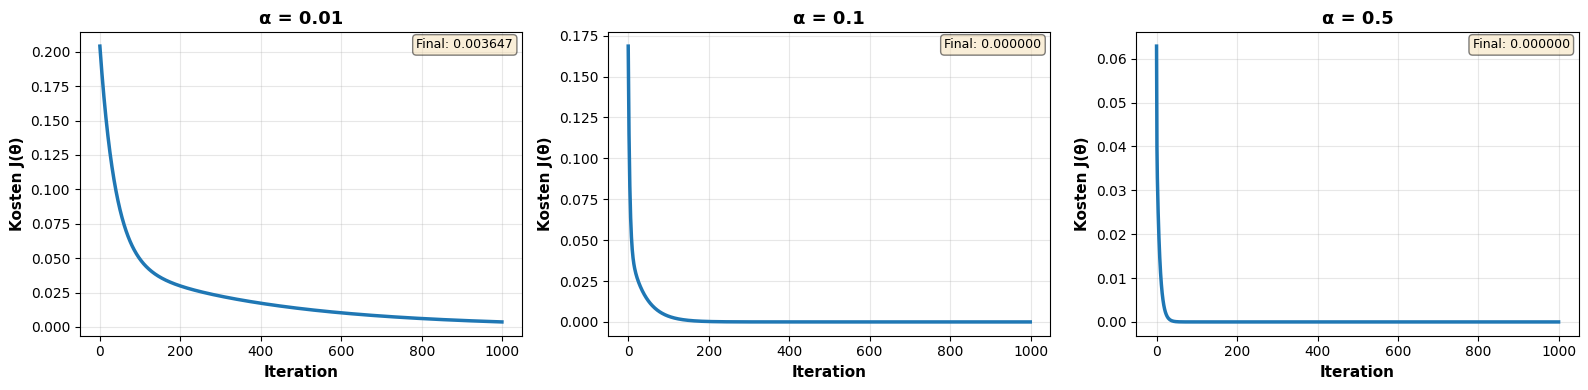

In [17]:
# ============================================
# 8. VERGLEICH: VERSCHIEDENE LERNRATEN
# ============================================
print("=" * 60)
print("8. EINFLUSS DER LERNRATE (Normalisierte Daten)")
print("=" * 60)

alphas = [0.01, 0.1, 0.5]
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, alpha in enumerate(alphas):
    _, _, hist = gradient_descent(
        X_norm, y_norm, 0, 0, alpha, 1000, verbose=False)
    costs = [h[2] for h in hist]

    axes[idx].plot(costs, linewidth=2.5)
    axes[idx].set_xlabel('Iteration', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Kosten J(θ)', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'α = {alpha}', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    final_cost = costs[-1] if not np.isinf(costs[-1]) else "inf"
    if isinstance(final_cost, float):
        axes[idx].text(0.98, 0.98, f'Final: {final_cost:.6f}',
                       transform=axes[idx].transAxes,
                       fontsize=9, verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    print(f"α = {alpha:4.2f}  →  Endkosten = {final_cost if isinstance(final_cost, str) else f'{final_cost:.6f}'}")

plt.tight_layout()
plt.show()
print()

9. STOCHASTISCHER GRADIENT DESCENT
Vergleich Batch GD vs Stochastischer GD (normalisierte Daten):

Batch GD:
  θ₀ = 0.0000, θ₁ = 1.0000
  Endkosten = 0.000000

Stochastischer GD:
  θ₀ = 0.0000, θ₁ = 1.0000
  Endkosten = 0.000000


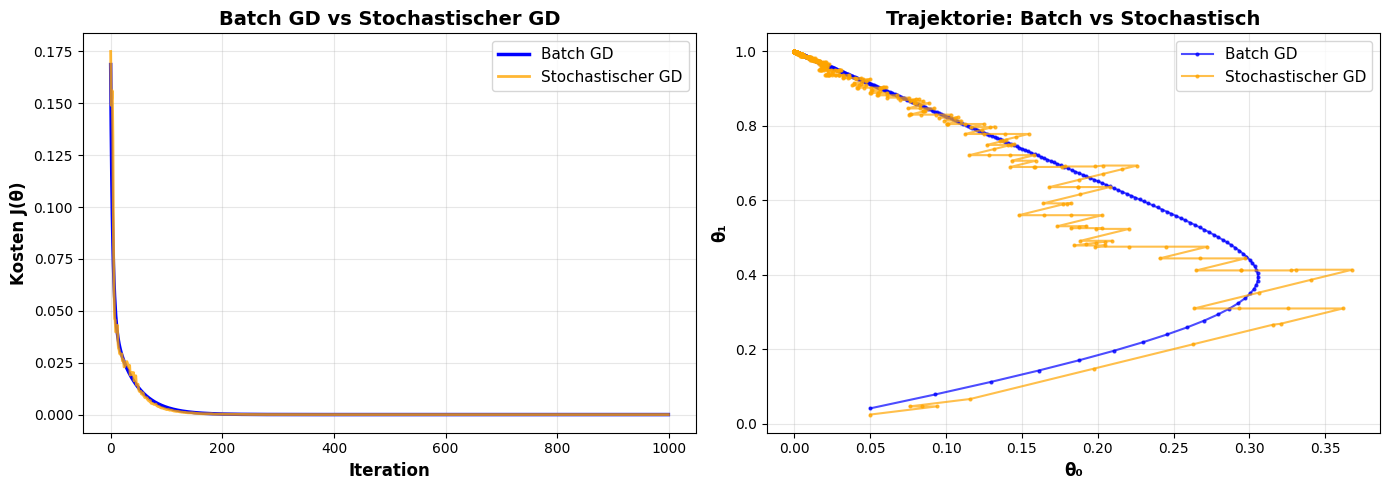


📊 Beobachtungen:
• Batch GD: glatte und deterministische Konvergenz
• Stochastischer GD: mehr 'Rauschen' aber konvergiert trotzdem!
• Mit NORMALISIERTEN Daten funktionieren beide viel besser!

✅ CODE ERFOLGREICH AUSGEFÜHRT!

💡 WICHTIGE LEKTIONEN:
1. Lernrate ist SEHR wichtig!
2. Datennormalisierung = schnellere Konvergenz
3. Mit Normalisierung können wir viel größeres α verwenden
4. Ohne Normalisierung: α muss winzig sein (0.00001)
5. Mit Normalisierung: α kann 0.1 sein (10.000x größer!)


In [18]:
# ============================================
# 9. STOCHASTISCHER GRADIENT DESCENT (SGD)
# ============================================
print("=" * 60)
print("9. STOCHASTISCHER GRADIENT DESCENT")
print("=" * 60)


def stochastic_gradient_descent(X, y, theta0_init, theta1_init, alpha, iterations):
    """
    SGD: Aktualisiere θ mit nur 1 zufälligem Beispiel pro Iteration
    """
    theta0 = theta0_init
    theta1 = theta1_init
    m = len(X)
    history = []

    for i in range(iterations):
        # Zufälliges Beispiel wählen
        idx = np.random.randint(0, m)
        x_i = X[idx]
        y_i = y[idx]

        # Vorhersage und Fehler für dieses Beispiel
        prediction = hypothesis(x_i, theta0, theta1)
        error = prediction - y_i

        # Nur mit diesem Beispiel aktualisieren
        theta0 = theta0 - alpha * error
        theta1 = theta1 - alpha * error * x_i

        # Kosten mit allen Daten berechnen (zur Überwachung)
        cost = cost_function(X, y, theta0, theta1)
        history.append((theta0, theta1, cost))

    return theta0, theta1, history


# SGD mit normalisierten Daten ausführen
theta0_sgd, theta1_sgd, history_sgd = stochastic_gradient_descent(
    X_norm, y_norm, 0, 0, 0.1, 1000
)

print("Vergleich Batch GD vs Stochastischer GD (normalisierte Daten):")
print(f"\nBatch GD:")
print(f"  θ₀ = {theta0_norm:.4f}, θ₁ = {theta1_norm:.4f}")
print(f"  Endkosten = {history_norm[-1][2]:.6f}")

print(f"\nStochastischer GD:")
print(f"  θ₀ = {theta0_sgd:.4f}, θ₁ = {theta1_sgd:.4f}")
print(f"  Endkosten = {history_sgd[-1][2]:.6f}")

# Vergleich visualisieren
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
costs_batch_norm = [h[2] for h in history_norm]
costs_sgd = [h[2] for h in history_sgd]
plt.plot(costs_batch_norm, label='Batch GD', linewidth=2.5, color='blue')
plt.plot(costs_sgd, label='Stochastischer GD',
         linewidth=2, alpha=0.8, color='orange')
plt.xlabel('Iteration', fontsize=12, fontweight='bold')
plt.ylabel('Kosten J(θ)', fontsize=12, fontweight='bold')
plt.title('Batch GD vs Stochastischer GD', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
theta0_norm_hist = [h[0] for h in history_norm]
theta1_norm_hist = [h[1] for h in history_norm]
theta0_sgd_hist = [h[0] for h in history_sgd]
theta1_sgd_hist = [h[1] for h in history_sgd]
plt.plot(theta0_norm_hist, theta1_norm_hist, 'o-', markersize=2, linewidth=1.5,
         alpha=0.7, label='Batch GD', color='blue')
plt.plot(theta0_sgd_hist, theta1_sgd_hist, 'o-', markersize=2, linewidth=1.5,
         alpha=0.7, label='Stochastischer GD', color='orange')
plt.xlabel('θ₀', fontsize=12, fontweight='bold')
plt.ylabel('θ₁', fontsize=12, fontweight='bold')
plt.title('Trajektorie: Batch vs Stochastisch', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Beobachtungen:")
print("• Batch GD: glatte und deterministische Konvergenz")
print("• Stochastischer GD: mehr 'Rauschen' aber konvergiert trotzdem!")
print("• Mit NORMALISIERTEN Daten funktionieren beide viel besser!\n")

print("=" * 60)
print("✅ CODE ERFOLGREICH AUSGEFÜHRT!")
print("=" * 60)
print("\n💡 WICHTIGE LEKTIONEN:")
print("1. Lernrate ist SEHR wichtig!")
print("2. Datennormalisierung = schnellere Konvergenz")
print("3. Mit Normalisierung können wir viel größeres α verwenden")
print("4. Ohne Normalisierung: α muss winzig sein (0.00001)")
print("5. Mit Normalisierung: α kann 0.1 sein (10.000x größer!)")